In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train = pd.read_csv("train_Df64byy.csv")
df_test = pd.read_csv("test_YCcRUnU.csv")

In [3]:
df_train.shape,df_test.shape

((50882, 14), (21805, 13))

In [4]:
df_train.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [5]:
df_train.isna().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [6]:
df_train = df_train.drop(['ID'],axis=1)
df_train.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [7]:
cat_label = [var for var in df_train.columns if df_train[var].dtypes == "object"]
cat_label = df_train[cat_label]
cat_label

,City_Code,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health Indicator,Holding_Policy_Duration
0,C3,Rented,Individual,No,X1,14+
1,C5,Owned,Joint,No,X2,NaN
2,C5,Owned,Individual,No,NaN,1.0
3,C24,Owned,Joint,No,X1,14+
4,C8,Rented,Individual,No,X2,3.0
...,...,...,...,...,...,...
50877,C4,Rented,Individual,No,X3,NaN
50878,C5,Rented,Individual,No,X3,7.0
50879,C1,Rented,Individual,No,X2,14+
50880,C1,Owned,Joint,No,X2,2.0


In [8]:
df_train['Accomodation_Type'] = pd.get_dummies(df_train['Accomodation_Type'])

In [9]:
df_train['Reco_Insurance_Type'].value_counts()

Individual    40536
Joint         10346
Name: Reco_Insurance_Type, dtype: int64

In [10]:
df_train['Accomodation_Type'].value_counts()

1    27951
0    22931
Name: Accomodation_Type, dtype: int64

In [11]:
def encode_Reco_Insurance_Type(Reco_Insurance_Type):
    if Reco_Insurance_Type =="Individual":
        return 1
    else:
        return 0
    
df_train['Reco_Insurance_Type'] = df_train['Reco_Insurance_Type'].apply(encode_Reco_Insurance_Type)

In [12]:
df_train['Is_Spouse'] = pd.get_dummies(df_train['Is_Spouse'])

In [13]:
df_train['Health Indicator'].value_counts()

X1    13010
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: Health Indicator, dtype: int64

In [14]:
df_train.columns

Index(['City_Code', 'Region_Code', 'Accomodation_Type', 'Reco_Insurance_Type',
       'Upper_Age', 'Lower_Age', 'Is_Spouse', 'Health Indicator',
       'Holding_Policy_Duration', 'Holding_Policy_Type', 'Reco_Policy_Cat',
       'Reco_Policy_Premium', 'Response'],
      dtype='object')

In [15]:
df_train.columns=['CityCode', 'RegionCode', 'AccomodationType', 'RecoInsuranceType',
       'UpperAge', 'LowerAge', 'IsSpouse', 'HealthIndicator',
       'HoldingPolicyDuration', 'HoldingPolicyType', 'RecoPolicyCat',
       'RecoPolicyPremium', 'Response']

In [16]:
def encode_HealthIndicator(HealthIndicator):
    if HealthIndicator =="X1":
        return 1
    elif HealthIndicator =="X2":
        return 2
    elif HealthIndicator =="X3":
        return 3
    elif HealthIndicator =="X4":
        return 4
    elif HealthIndicator =="X5":
        return 5
    elif HealthIndicator =="X6":
        return 6
    elif HealthIndicator =="X7":
        return 7
    elif HealthIndicator =="X8":
        return 8
    elif HealthIndicator =="X9":
        return 9
    
    
df_train['HealthIndicator'] = df_train['HealthIndicator'].apply(encode_HealthIndicator)

In [17]:
def encode_CityCode(CityCode):
    if CityCode =="C1":
        return 1
    elif CityCode =="C2":
        return 2
    elif CityCode =="C3":
        return 3
    elif CityCode =="C4":
        return 4
    elif CityCode =="C5":
        return 5
    elif CityCode =="C6":
        return 6
    elif CityCode =="C7":
        return 7
    elif CityCode =="C8":
        return 8
    elif CityCode =="C9":
        return 9
    elif CityCode =="C10":
        return 10
    elif CityCode =="C11":
        return 11
    elif CityCode =="C12":
        return 12
    elif CityCode =="C13":
        return 13
    elif CityCode =="C14":
        return 14
    elif CityCode =="C15":
        return 15
    elif CityCode =="C16":
        return 16
    elif CityCode =="C17":
        return 17
    elif CityCode =="C18":
        return 18
    elif CityCode =="C19":
        return 19
    elif CityCode =="C20":
        return 20
    elif CityCode =="C21":
        return 21
    elif CityCode =="C22":
        return 22
    elif CityCode =="C23":
        return 23
    elif CityCode =="C24":
        return 24
    elif CityCode =="C25":
        return 25
    elif CityCode =="C26":
        return 26
    elif CityCode =="C27":
        return 27
    elif CityCode =="C28":
        return 28
    elif CityCode =="C29":
        return 29
    elif CityCode =="C30":
        return 30
    elif CityCode =="C31":
        return 31
    elif CityCode =="C32":
        return 32
    elif CityCode =="C33":
        return 33
    elif CityCode =="C34":
        return 34
    elif CityCode =="C35":
        return 35
    elif CityCode =="C36":
        return 36
    
    
        
df_train['CityCode'] = df_train['CityCode'].apply(encode_CityCode)

In [18]:
def encode_HoldingPolicyDuration(HoldingPolicyDuration):
    if HoldingPolicyDuration =='1.0':
        return 1
    elif HoldingPolicyDuration =='2.0':
        return 2
    elif HoldingPolicyDuration =='3.0':
        return 3
    elif HoldingPolicyDuration =='4.0':
        return 4
    elif HoldingPolicyDuration =='5.0':
        return 5
    elif HoldingPolicyDuration =='6.0':
        return 6
    elif HoldingPolicyDuration =='7.0':
        return 7
    elif HoldingPolicyDuration =='8.0':
        return 8
    elif HoldingPolicyDuration =='9.0':
        return 9
    elif HoldingPolicyDuration =='10.0':
        return 10
    elif HoldingPolicyDuration =='11.0':
        return 11
    elif HoldingPolicyDuration =='12.0':
        return 12
    elif HoldingPolicyDuration =='13.0':
        return 13
    elif HoldingPolicyDuration =='14.0':
        return 14
    elif HoldingPolicyDuration =='14.0+':
        return 15

    
df_train['HoldingPolicyDuration'] = df_train['HoldingPolicyDuration'].apply(encode_HoldingPolicyDuration)

In [19]:
df_train.head()

,CityCode,RegionCode,AccomodationType,RecoInsuranceType,UpperAge,LowerAge,IsSpouse,HealthIndicator,HoldingPolicyDuration,HoldingPolicyType,RecoPolicyCat,RecoPolicyPremium,Response
0,3,3213,0,1,36,36,1,1.0,NaN,3.0,22,11628.0,0
1,5,1117,1,0,75,22,1,2.0,NaN,NaN,22,30510.0,0
2,5,3732,1,1,32,32,1,NaN,1.0,1.0,19,7450.0,1
3,24,4378,1,0,52,48,1,1.0,NaN,3.0,19,17780.0,0
4,8,2190,0,1,44,44,1,2.0,3.0,1.0,16,10404.0,0


In [20]:
df_train

,CityCode,RegionCode,AccomodationType,RecoInsuranceType,UpperAge,LowerAge,IsSpouse,HealthIndicator,HoldingPolicyDuration,HoldingPolicyType,RecoPolicyCat,RecoPolicyPremium,Response
0,3,3213,0,1,36,36,1,1.0,NaN,3.0,22,11628.0,0
1,5,1117,1,0,75,22,1,2.0,NaN,NaN,22,30510.0,0
2,5,3732,1,1,32,32,1,NaN,1.0,1.0,19,7450.0,1
3,24,4378,1,0,52,48,1,1.0,NaN,3.0,19,17780.0,0
4,8,2190,0,1,44,44,1,2.0,3.0,1.0,16,10404.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,4,845,0,1,22,22,1,3.0,NaN,NaN,18,7704.0,0
50878,5,4188,0,1,27,27,1,3.0,7.0,3.0,4,5408.0,0
50879,1,442,0,1,63,63,1,2.0,NaN,1.0,12,11374.0,0
50880,1,4,1,0,71,49,1,2.0,2.0,2.0,16,28179.2,1


In [21]:
df_train['HoldingPolicyDuration'].value_counts()

1.0     4499
2.0     4260
3.0     3586
4.0     2771
5.0     2362
6.0     1894
7.0     1645
8.0     1316
9.0     1114
10.0     813
11.0     546
12.0     513
13.0     511
14.0     466
Name: HoldingPolicyDuration, dtype: int64

In [22]:
df_train.skew()

CityCode                 1.212203
RegionCode               0.798096
AccomodationType        -0.198293
RecoInsuranceType       -1.474244
UpperAge                 0.217370
LowerAge                 0.330594
IsSpouse                -1.800028
HealthIndicator          1.003491
HoldingPolicyDuration    0.948271
HoldingPolicyType       -0.198895
RecoPolicyCat           -0.928224
RecoPolicyPremium        0.782463
Response                 1.217936
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A4CA7713A0>,
      dtype=object)

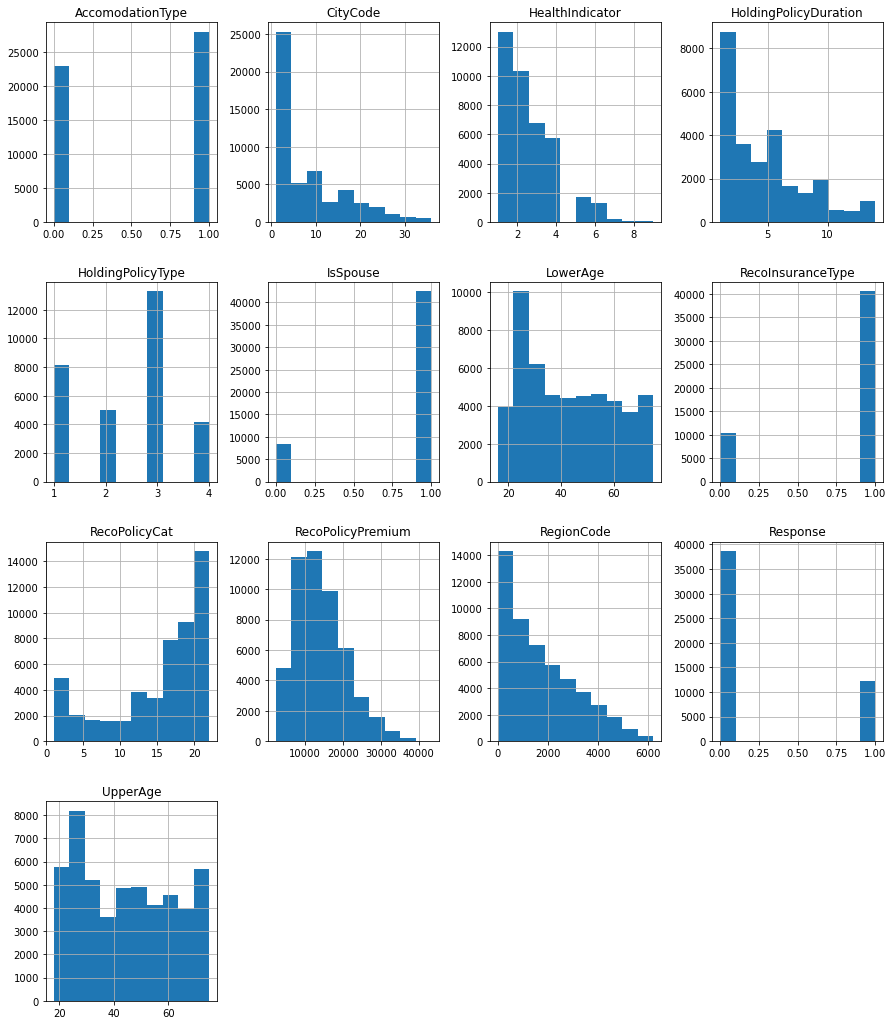

In [23]:
plt.rcParams["figure.figsize"] = 15,18
df_train.hist()

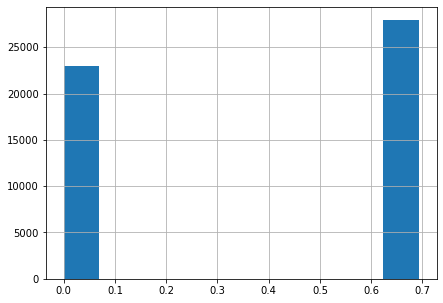

In [24]:
plt.rcParams["figure.figsize"] = 7,5
df_train['AccomodationType']= np.log1p(df_train['AccomodationType'])
df_train['AccomodationType'].hist()

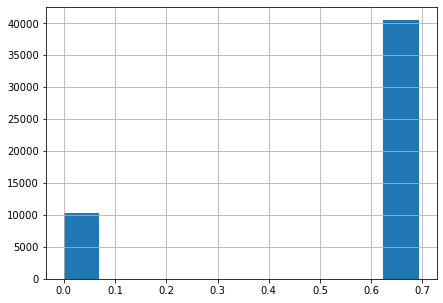

In [25]:
plt.rcParams["figure.figsize"] = 7,5
df_train['RecoInsuranceType']= np.log1p(df_train['RecoInsuranceType'])
df_train['RecoInsuranceType'].hist()

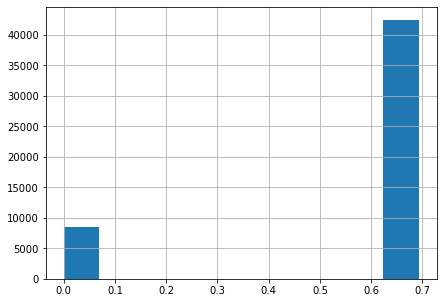

In [26]:
plt.rcParams["figure.figsize"] = 7,5
df_train['IsSpouse']= np.log1p(df_train['IsSpouse'])
df_train['IsSpouse'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A4CBF41520>,
      dtype=object)

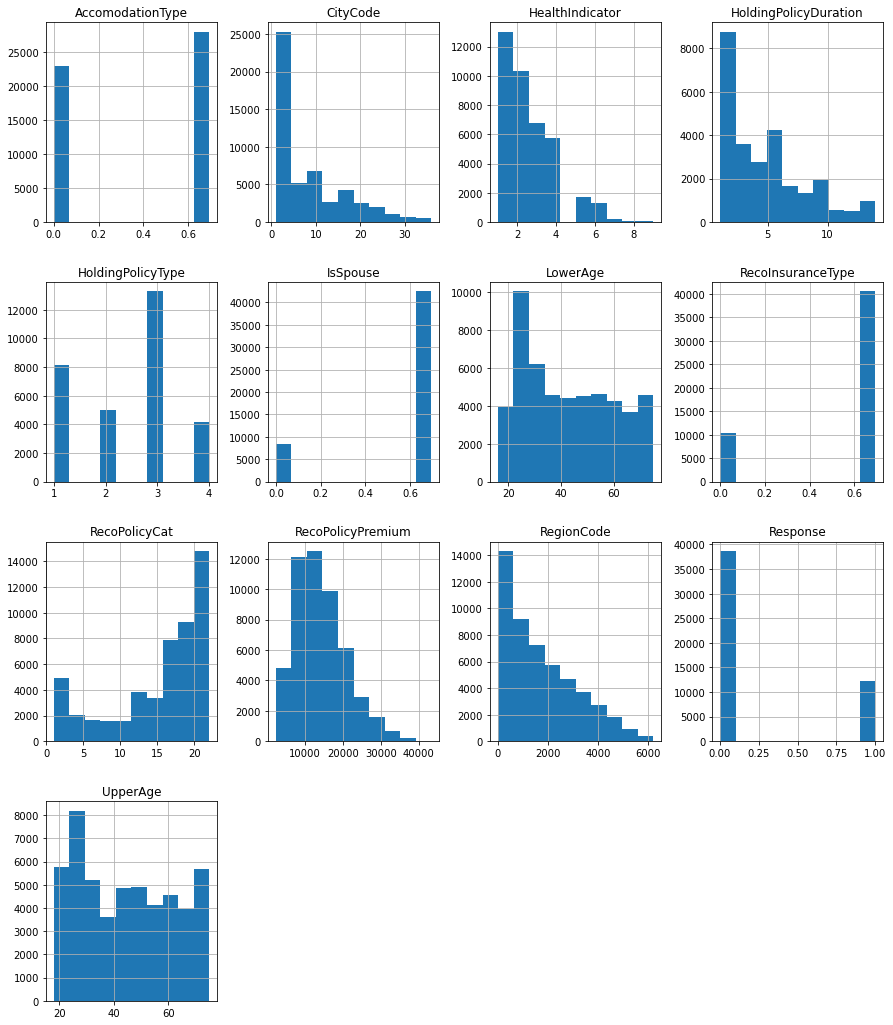

In [27]:
plt.rcParams["figure.figsize"] = 15,18
df_train.hist()

In [28]:
x = df_train.drop(['Response'],axis=1)
y = df_train['Response']

In [29]:
x['HoldingPolicyDuration'] =x['HoldingPolicyDuration'].fillna(x['HoldingPolicyDuration'].median())
x['HealthIndicator'] =x['HealthIndicator'].fillna(x['HealthIndicator'].median())
x['HoldingPolicyType'] =x['HoldingPolicyType'].fillna(x['HoldingPolicyType'].median())
x = x.apply(lambda x:(x.astype(float) - min(x))/(max(x)-min(x)), axis = 0)
x.head()

,CityCode,RegionCode,AccomodationType,RecoInsuranceType,UpperAge,LowerAge,IsSpouse,HealthIndicator,HoldingPolicyDuration,HoldingPolicyType,RecoPolicyCat,RecoPolicyPremium
0,0.057143,0.518650,0.0,1.0,0.315789,0.338983,1.0,0.000,0.230769,0.666667,1.000000,0.227609
1,0.114286,0.180203,1.0,0.0,1.000000,0.101695,1.0,0.125,0.230769,0.666667,1.000000,0.687356
2,0.114286,0.602454,1.0,1.0,0.245614,0.271186,1.0,0.125,0.000000,0.000000,0.857143,0.125881
3,0.657143,0.706766,1.0,0.0,0.596491,0.542373,1.0,0.000,0.230769,0.666667,0.857143,0.377401
4,0.200000,0.353464,0.0,1.0,0.456140,0.474576,1.0,0.125,0.153846,0.000000,0.714286,0.197807


In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42,stratify=y)

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [32]:
pipeline_lr=Pipeline([('lr_classifier',LogisticRegression(random_state=0))])
pipeline_dt=Pipeline([('dt_classifier',DecisionTreeClassifier())])
pipeline_rf=Pipeline([('rf_classifier',RandomForestClassifier(class_weight = ({0:100, 1:99929180})))])
pipeline_Nb=Pipeline([('Nb_Gaussion',GaussianNB())])
pipeline_XGb=Pipeline([('XGb_classifier',XGBClassifier())])
pipeline_KN=Pipeline([('KNeighborsClassifier',KNeighborsClassifier(n_neighbors=25))])

In [33]:
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf,pipeline_Nb,pipeline_XGb,pipeline_KN]

In [34]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest',3:'GaussianNB',4:'XGBClassifier',5:'pipeline_KN'}

In [35]:
for pipe in pipelines:
    pipe.fit(x_train, y_train)

[18:12:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [36]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(x_test,y_test)))
    print(classification_report(y_test,model.predict(x_test)))
    y_pred_new=model.predict(x_test)

Logistic Regression Test Accuracy: 0.7600393056010482
              precision    recall  f1-score   support

           0       0.76      1.00      0.86     11602
           1       0.00      0.00      0.00      3663

    accuracy                           0.76     15265
   macro avg       0.38      0.50      0.43     15265
weighted avg       0.58      0.76      0.66     15265

Decision Tree Test Accuracy: 0.6629544710121192
              precision    recall  f1-score   support

           0       0.78      0.77      0.78     11602
           1       0.31      0.33      0.32      3663

    accuracy                           0.66     15265
   macro avg       0.55      0.55      0.55     15265
weighted avg       0.67      0.66      0.67     15265

RandomForest Test Accuracy: 0.7576154602030789
              precision    recall  f1-score   support

           0       0.76      0.99      0.86     11602
           1       0.39      0.02      0.03      3663

    accuracy                     

In [37]:
y_pred_new

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
ypred= pd.DataFrame(y_pred_new )

In [39]:
pd.set_option("display.max_rows",None)

In [40]:
ypred

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [41]:
ypred.columns= ["Response"]

In [ ]:
ypred